In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, precision_score

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Exploratory Data Analysis

Filling the Missing values:

In [3]:
df['Glucose'] = df['Glucose'].replace(0,np.mean(df['Glucose']))
df['BloodPressure'] = df['BloodPressure'].replace(0,np.mean(df['BloodPressure']))
df['SkinThickness'] = df['SkinThickness'].replace(0,np.mean(df['SkinThickness']))
df['Insulin'] = df['Insulin'].replace(0,np.mean(df['Insulin']))
df['BMI'] = df['BMI'].replace(0,np.mean(df['BMI']))

Plotting the Feature variables:

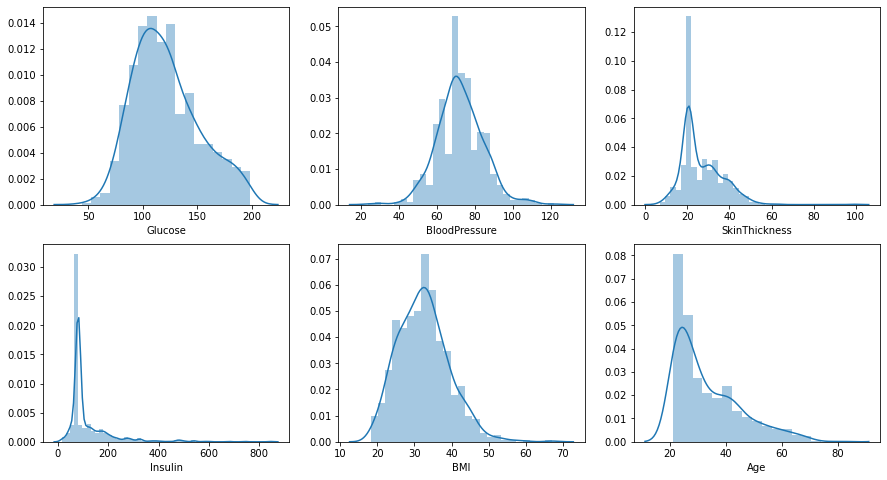

In [4]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.distplot(df['Glucose'])
plt.subplot(2,3,2)
sns.distplot(df['BloodPressure'])
plt.subplot(2,3,3)
sns.distplot(df['SkinThickness'])
plt.subplot(2,3,4)
sns.distplot(df['Insulin'])
plt.subplot(2,3,5)
sns.distplot(df['BMI'])
plt.subplot(2,3,6)
sns.distplot(df['Age'])

plt.savefig('Distribution of the features(Diabetes).jpeg')

In [5]:
x = df.iloc[:, 0:8]
y = df.iloc[:, 8]

Feature Selection:

In [6]:
feature = SelectKBest(score_func=chi2, k='all')
feat = feature.fit(x, y)
dfscores = pd.DataFrame(feat.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores)

                      Specs        Score
0               Pregnancies   111.519691
1                   Glucose  1418.660636
2             BloodPressure    41.394665
3             SkinThickness    81.917622
4                   Insulin  1798.088682
5                       BMI   108.937867
6  DiabetesPedigreeFunction     5.392682
7                       Age   181.303689


In [7]:
x1 = df.drop(['DiabetesPedigreeFunction','Outcome'], axis=1)
y1 = df["Outcome"]

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(x1)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y1, test_size=0.25, random_state=42)

Creating a simple model:

In [10]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred = rf.predict(x_test)

Evaluating the model:

In [12]:
f1 = f1_score(y_test, y_pred)
print('F1 Score:',f1)

acc = accuracy_score(y_test, y_pred)
print('Accuracy Score:',acc)

conf = confusion_matrix(y_test, y_pred)
print(conf)

F1 Score: 0.624113475177305
Accuracy Score: 0.7239583333333334
[[95 28]
 [25 44]]


Hyperparameter Tuning:

In [13]:
param = {'max_depth': [20, 40, 60, 80, 100], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 
         'min_samples_split': [2, 5, 10], 'n_estimators': [10, 100, 1000]}

In [14]:
rand = RandomizedSearchCV(estimator=rf, param_distributions=param, cv=5, n_jobs=-1, random_state=42)
rand.fit(X, y1)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [20, 40, 60, 80, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 100, 1000]},
                   random_state=42)

In [15]:
print("Best parameter:",rand.best_params_)
print("Best Score:",rand.best_score_)

Best parameter: {'n_estimators': 10, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best Score: 0.7630846277905101
